In [1]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
%matplotlib inline

# OCO2 - Analyze the CO² plume of Laiwu city

Project for **Data For Good**, season 7. 

*By Quentin Kamenda, Benoît Courty*


---

## Introduction

Using Data from [OCO-2 Satellite](en.wikipedia.org/wiki/Orbiting_Carbon_Observatory_2), issued by the NASA.

`//TODO: Explanation`

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook as tqdm
import numpy as np

#from mpl_toolkits.basemap import Basemap  #Imported directly from the github repository

---

## Retieve Data

Sample data can be accessed freely on the NASA Database, among other open data from several NASA sattelites.

We will be using CSV aggregated by *Benoit Courty* [here](https://courty.fr/OCO2/).

In [4]:
#data_1610 = pd.read_csv("http://courty.fr/OCO2/oco2_1610.csv", sep=";")
#data_1705 = pd.read_csv("http://courty.fr/OCO2/oco2_1705.csv", sep=";")
#data_1803 = pd.read_csv("http://courty.fr/OCO2/oco2_1803.csv", sep=";")
#data_1805 = pd.read_csv("http://courty.fr/OCO2/oco2_1805.csv", sep=";")
#data_1808 = pd.read_csv("http://courty.fr/OCO2/oco2_1808.csv", sep=";")
data_1808 = pd.read_csv("../../../datasets/OCO2/csv/oco2_1808.csv", sep=";")
#data_1809 = pd.read_csv("http://courty.fr/OCO2/oco2_1809.csv", sep=";")

data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184


In [5]:
data_1808.describe()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
count,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06
mean,2.018082e+15,9.176796e+00,-3.778302e+00,4.047848e+02,5.104777e-01,2.194239e+04,-1.533030e+00,2.852832e-01
std,9.141199e+08,2.900338e+01,1.112529e+02,1.868212e+00,1.293196e-01,1.332497e+02,4.292128e+00,3.490388e+00
min,2.018080e+15,-5.199191e+01,-1.799998e+02,3.895988e+02,2.017396e-03,2.170900e+04,-1.231609e+01,-1.428720e+01
25%,2.018081e+15,-1.714714e+01,-1.143912e+02,4.038899e+02,4.171058e-01,2.181300e+04,-4.930158e+00,-2.060896e+00
50%,2.018082e+15,4.388992e+00,4.388185e-01,4.052918e+02,4.851733e-01,2.195700e+04,-2.304201e+00,3.646293e-01
75%,2.018082e+15,3.448813e+01,1.007937e+02,4.060902e+02,5.803099e-01,2.205600e+04,1.599859e+00,2.797290e+00
max,2.018083e+15,8.186122e+01,1.799996e+02,4.169399e+02,1.983425e+00,2.216000e+04,1.637950e+01,1.493328e+01


In [6]:
data_1808.orbit.value_counts()

21928    16134
21715    15418
21811    14523
21983    13505
22003    13264
         ...  
21746      105
22110       82
22126       80
22160       40
22154       30
Name: orbit, Length: 408, dtype: int64

To convert the  ``` sounding_id ``` into a datetime variable ```data```:



In [7]:
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

# data_1610['date'] = data_1610['sounding_id'].apply(to_date)
# data_1705['date'] = data_1705['sounding_id'].apply(to_date)
# data_1803['date'] = data_1803['sounding_id'].apply(to_date)
# data_1805['date'] = data_1805['sounding_id'].apply(to_date)
data_1808['date'] = data_1808['sounding_id'].apply(to_date)
# data_1809['date'] = data_1809['sounding_id'].apply(to_date)

In [8]:
data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431,2018-08-01 00:46:21.050
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859,2018-08-01 00:46:21.370
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507,2018-08-01 00:46:21.710
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914,2018-08-01 00:46:21.720
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184,2018-08-01 00:46:21.730


We are seaking the emission peaks taken as an example in the annexes of F. Chevallier's article **Observing carbon dioxide emissions over China's cities with the Orbiting Carbon Observatory-2**:



*   Over Anshan, the 17th October 2016 
*   Over Baotou, the 17th May 2018
*   Over Dezhou, the 24th September 2018
*   Over Laiwu, the 25th August 2018
*   Over Nanjing, the 9th March 2018
*   Over Tangshan, the 18th May 2017



---

### Laiwu, 25th August 2018

In [9]:
# We consider the August 2018 datset at the right day
data_1808_25 = data_1808[data_1808['date'] < "2018-08-26"]
data_1808_25 = data_1808_25[data_1808_25['date'] > "2018-08-25"]

#draw_map(data_1808_25)

In [10]:
# We consider the orgit going over East China
#data_laiwu = data_1808_25[data_1808_25['longitude'] > 110]
#data_laiwu = data_laiwu[data_laiwu['longitude'] < 125]
data_laiwu = data_1808_25[data_1808_25['orbit'] == 22061]
data_laiwu.head(3)

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
2061319,2018082504501738,-43.749119,135.989822,403.642273,0.572042,22061,11.114212,-4.509858,2018-08-25 04:50:17.380
2061320,2018082504501777,-43.735889,136.010880,404.398529,0.466245,22061,11.103701,-4.486870,2018-08-25 04:50:17.770
2061321,2018082504501778,-43.731358,135.985352,404.115814,0.528921,22061,11.101484,-4.501010,2018-08-25 04:50:17.780


### Keep only the city zone

In [11]:
#data_laiwu=data_laiwu.query('longitude>116.5 and longitude<118.2 and latitude>35.4 and latitude<37.1')
#data_laiwu=data_laiwu.query('longitude>100 and longitude<130 and latitude>30 and latitude<45')

### Plot the OCO2 sensor data

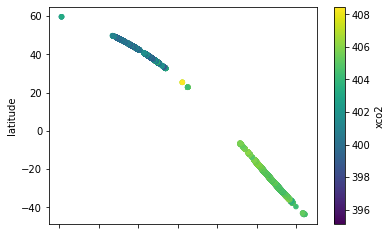

In [12]:
data_laiwu.plot.scatter(x='longitude', y='latitude', c='xco2', colormap='viridis')

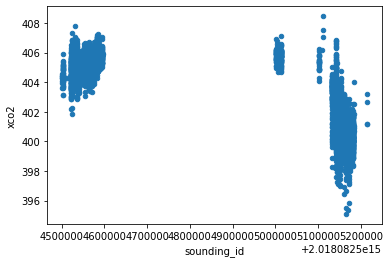

In [13]:
data_laiwu.plot.scatter(x='sounding_id', y='xco2')

### Compute distance from latitude, longitude (haversine)

In [14]:
#df_full['orbit'].unique()

In [15]:
import math
df_full = pd.DataFrame()
for orbit in tqdm(data_1808_25['orbit'].unique()):
    df_orbit = data_1808_25[data_1808_25['orbit'] == orbit]
    latitude_origin = df_orbit.iloc[0]['latitude']
    longitude_origin = df_orbit.iloc[0]['longitude']
    df_orbit['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(df_orbit['latitude'])
        - math.radians(latitude_origin))/2)**2 + math.cos(math.radians(latitude_origin))
        * np.cos(np.radians(df_orbit['latitude'])) * np.sin((np.radians(df_orbit['longitude'])
        - math.radians(longitude_origin))/2)**2))
    df_full = df_full.append(df_orbit)
df_full = df_full.sort_values(by=['orbit','distance']).reindex()


#TODO: Change the formula to compute the distance from the trace origin
# latitude_origin = data_laiwu.iloc[0]['latitude']
# longitude_origin = data_laiwu.iloc[0]['longitude']
# data_laiwu['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(data_laiwu['latitude'])
#     - math.radians(latitude_origin))/2)**2 + math.cos(math.radians(latitude_origin))
#     * np.cos(np.radians(data_laiwu['latitude'])) * np.sin((np.radians(data_laiwu['longitude'])
#     - math.radians(longitude_origin))/2)**2))
# data_laiwu.plot.scatter(x='distance', y='xco2')

/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# Gaussian fit

## scipy curve_fit

In [16]:

df_full[df_full.orbit == 22058].head(3)

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date,distance
2043481,2018082500001474,-22.253984,-154.654938,404.564148,0.500219,22058,0.378373,-5.757070,2018-08-25 00:00:14.740,0.000000
2043482,2018082500001505,-22.235153,-154.674118,405.992462,0.573346,22058,0.385515,-5.745126,2018-08-25 00:00:15.050,2.875928
2043483,2018082500001506,-22.234627,-154.689468,405.832611,0.500685,22058,0.396247,-5.737138,2018-08-25 00:00:15.060,4.152293


In [18]:
# spatial window for the detection (km)
window = 200
good_find = 0

peak_founds = []

'''
x : the data input value
m : the slope of the data
b : the intercep of the data
A : Amplitude de la courbe
sig : sigma / écart type de la courbe
'''
def gaussian(x, m, b, A, sig):
    return m * x + b + A / (sig * (2 * np.pi)**0.5) * np.exp(-x**2 / (2*sig**2))

for orbit in tqdm(df_full['orbit'].unique(), desc='Orbit'):
#for orbit in tqdm([22061, 21928, 16134, 21715], desc='Orbit'):
    df_orbit = df_full[df_full['orbit'] == orbit]
    if len(df_orbit) < 500:
        continue
    latitude_origin = df_orbit.iloc[0]['latitude']
    longitude_origin = df_orbit.iloc[0]['longitude']
    
    try:
        # Loop over the souding id's
        for i, j in tqdm(enumerate(df_orbit.index), desc='Souding', total=len(df_orbit)):
            # Work only each n soundings (15 seems good)
            if i % 15 != 0: continue
            ## !!!!!!
            #j = 2070068
            km_start = df_orbit.loc[j, 'distance']
            km_end = km_start + window
            # Slice back because our input point is the middle of the peak
            df_slice = df_orbit.query('distance >= (@km_start-@window/2) and distance <= @km_end')
            # Skip if too few data
            if len(df_slice)<400:
                #print('ERROR : Not enought data')
                continue
            med_temp = np.median(df_slice['xco2'])
            std_temp = np.std(df_slice['xco2'])
            df_slice['xco2_enhancement'] = df_slice['xco2'] - med_temp
            # Base parameters for : m, b, A, sig
            p0 = (0.,med_temp,30*df_slice.loc[j,'xco2_enhancement'],10.) 
            #print('Estimated parameters:', p0)
            d_centered = df_slice['distance'] - km_start
            '''
            Gaussian Fit
            scipy.optimize.curve_fit
            scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
            p0 = Initial guess for the parameters (length N).
            sigma : Determines the uncertainty in ydata.
            '''
            popt, pcov = curve_fit(f=gaussian, xdata=d_centered, ydata=df_slice['xco2'], sigma = df_slice['xco2_uncert'], p0 = p0, maxfev=20000)
    #         print('Best m, b, A, sig = ', popt)
    #         plt.plot(d_centered, gaussian(x = d_centered, m=popt[0], b=popt[1], A=popt[2], sig=popt[3]), 'r', label='fit')
    #         plt.scatter(x=d_centered, y=df_slice['xco2']) 
            sig = abs(popt[3])  # sigma of the Gaussian (km)
            #print(sig)
            if sig < 2 : continue  # too narrow
            if 3*sig > window / 2.: continue  # too large
            delta = popt[2]/(popt[3]*(2 * np.pi)**0.5)  # height of the peak (ppm)
            if delta < 0: continue  # depletion
            d_plume = df_slice[(d_centered >= -2*sig) & (d_centered <= 2*sig)]
            d_backg = df_slice[(d_centered < -2*sig) | (d_centered > 2*sig)]
            d_peak = df_slice[(d_centered >= -4*sig) & (d_centered <= 4*sig)]
            d_peak_distance = d_peak['distance'] - df_slice.loc[j, 'distance']
            # we want at least 1 1-km-sounding per km on average on both sides of the peak within 2 sigmas and between 2 and 3 sigmas
            if len(df_slice[(d_centered >= -1*sig) & (d_centered <= 0)]) < int(sig): continue
            if len(df_slice[(d_centered <= 1*sig) & (d_centered >= 0)]) < int(sig): continue
            if len(df_slice[(d_centered >= -3*sig) & (d_centered <= -2*sig)]) < int(sig): continue
            if len(df_slice[(d_centered <= 3*sig) & (d_centered >= 2*sig)]) < int(sig): continue
            # check the quality of the fit
            R = np.corrcoef(gaussian(d_peak_distance,*popt), d_peak['xco2'])
            if R[0,1]**2 < 0.25 : continue
            good_find += 1
            print('index',j, 'Number of good fit',good_find, 'Sigma:', sig, 'Ampleur de l\'émission de CO²:',delta,'Coef de coreflation',R, 'len dataset:', len(df_slice))
            # TODO: Add filename of input to be able to load it later
            peak = {
                'sounding' : j,
                'latitude' : df_slice.loc[j, 'latitude'],
                'longitude' : df_slice.loc[j, 'longitude'],
                'orbit' : orbit,
                'sigma': sig,
                'popt': popt,
                'delta': delta,
                'R' : R
            }
            #print(peak)
            peak_founds.append(peak)
            #break
        if good_find==0:
            print('NO PEAK FOUND for orbit', orbit)
        else:
            filename = '../../../datasets/OCO2/csv/result_' + str(orbit) + 'test.csv'
            print('Saving to', filename)
            df = pd.DataFrame(peak_founds)
            df.to_csv(filename)
    except RuntimeError: 
      # curve_fit failed 
      print('LOST orbit', orbit, 'j', j)


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
index 2060448 Number of good fit 14 Sigma: 26.800431009264873 Ampleur de l'émission de CO²: 1.3598144921644468 Coef de coreflation [[1.         0.54424728]
 [0.54424728 1.        ]] len dataset: 503
{'sounding': 2060448, 'latitude': 68.89728546142578, 'longitude': 126.21080780029295, 'orbit': 22060, 'sigma': 26.800431009264873, 'popt': array([7.658

ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
index 2062427 Number of good fit 20 Sigma: 33.06467767595203 Ampleur de l'émission de CO²: 0.14712455065808383 Coef de coreflation [[1.         0.55407029]
 [0.55407029 1.        ]] len dataset: 1044
{'sounding': 2062427, 'latitude': -32.481632232666016, 'longitude': 133.36318969726562, 'orbit': 22061, 'sigma': 33.06467767595203, 'popt': array([-3.02997073e-03,  4.05139821e+02,  1.21938087e+01,  3.30646777e+01]), 'delta': 0.14712455065808383, 'R': array([[1.        , 0.55407029],
       [0.55407

ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
index 2075424 Number of good fit 39 Sigma: 19.63774194892492 Ampleur de l'émission de CO²: 0.0299962553007994 Coef de coreflation [[1.         0.66299603]
 [0.66299603 1.        ]] len dataset: 794
{'sounding': 2075424, 'latitude': -20.93263244628906

ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data
ERROR : Not enought data


NameError: name 'd_good' is not defined

In [ ]:
# print(x)
# print(popt)
print(gaussian(50, *popt))
#data_laiwu.loc[2070068, 'distance']

Best m, b, A, sig =  [1.58566231e-03 4.00922774e+02 1.40038095e+02 1.66660146e+01]


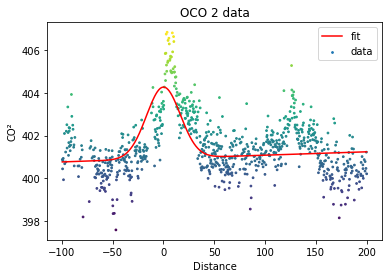

Best m, b, A, sig =  [9.20985920e-04 4.00952025e+02 1.30725685e+02 1.37129697e+01]


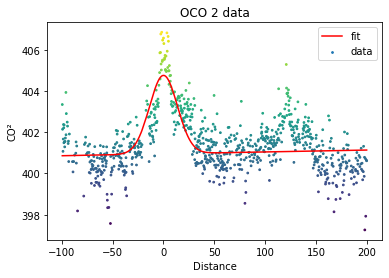

Best m, b, A, sig =  [1.20204197e-03 4.00877150e+02 1.35396287e+02 1.36973864e+01]


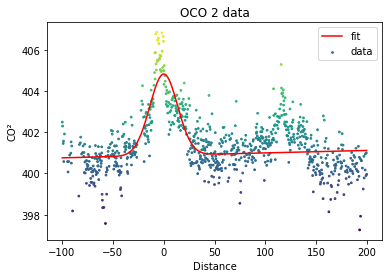

Best m, b, A, sig =  [9.44451667e-04 4.00842893e+02 1.41800452e+02 1.56539266e+01]


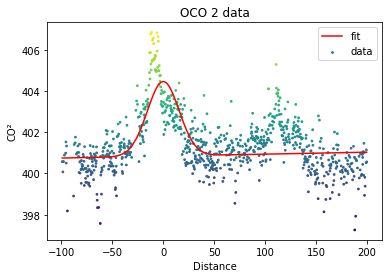

Best m, b, A, sig =  [1.95477347e-04 4.00862454e+02 1.39718657e+02 1.80243497e+01]


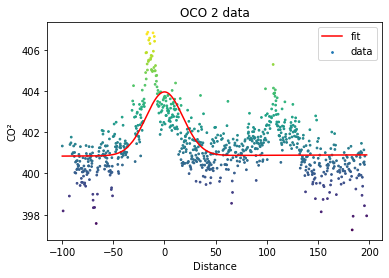

In [19]:
for index, peak in enumerate(peak_founds):
#     index=np.argmin(sigmas)
#     popt=popt_saved[index]
    if peak['delta'] < 1 : continue
    popt = peak['popt']
    orbit = peak['orbit']
    print('Best m, b, A, sig = ', popt)
    df_orbit = df_full[df_full['orbit'] == peak['orbit']]
    km_start = df_orbit.loc[peak['sounding'], 'distance']
    km_end = km_start + window
    # Slice back because our input point is the middle of the peak
    df_slice = df_full.query('distance >= (@km_start-@window/2) and distance <= @km_end and orbit == @orbit')
    x = df_slice['distance']-km_start
    y = df_slice['xco2']
    plt.scatter(x, y, c=y, s=3, label='data')
    plt.plot(x, gaussian(x, m=popt[0], b=popt[1], A=popt[2], sig=popt[3]), 'r', label='fit')
    plt.legend()
    plt.title('OCO 2 data')
    plt.xlabel('Distance')
    plt.ylabel('CO²')
    plt.show()

Best m, b, A, sig =  [1.20204197e-03 4.00877150e+02 1.35396287e+02 1.36973864e+01]


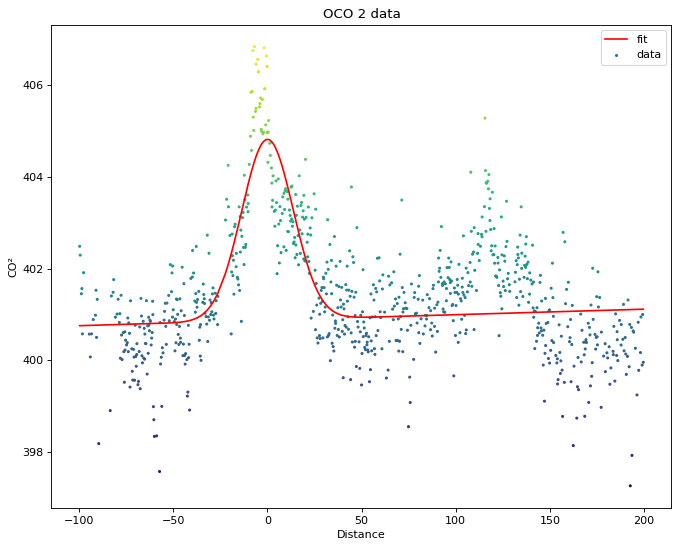

In [20]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# [ expression for item in list if conditional ]
values = [ p['delta'] for p in peak_founds]

index=np.argmax(values)
peak=peak_founds[index]
popt = peak['popt']
orbit = peak['orbit']
km_start = df_full.loc[peak['sounding'], 'distance']
km_end = km_start + window
# Slice back because our input point is the middle of the peak
df_slice = df_full.query('distance >= (@km_start-@window/2) and distance <= @km_end and orbit == @orbit')
x = df_slice['distance']-km_start
y = df_slice['xco2']
print('Best m, b, A, sig = ', peak['popt'])
plt.scatter(x, y, c=y, s=3, label='data')
plt.plot(x, gaussian(x = x, m=popt[0], b=popt[1], A=popt[2], sig=popt[3]), 'r', label='fit')
plt.legend()
plt.title('OCO 2 data')
plt.xlabel('Distance')
plt.ylabel('CO²')
plt.show()

Best m, b, A, sig are :  [1.20204197e-03 4.00877150e+02 1.35396287e+02 1.36973864e+01]


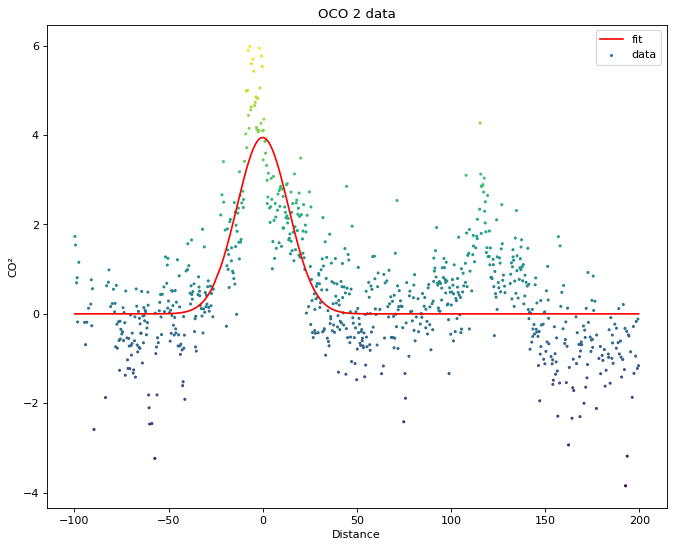

In [21]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

values = [ p['delta'] for p in peak_founds]

# Get the array index of the biggest delta
index=np.argmax(values)
peak=peak_founds[index]
orbit = peak['orbit']
km_start = df_full.loc[peak['sounding'], 'distance']
km_end = km_start + window
# Slice back because our input point is the middle of the peak
df_slice = df_full.query('distance >= (@km_start-@window/2) and distance <= @km_end and orbit == @orbit')
x = df_slice['distance']-km_start
y = df_slice['xco2']

# Get the gaussian function parameters at this position
popt=peak['popt']
print('Best m, b, A, sig are : ', popt)
m=popt[0]
b=popt[1]
A=popt[2]
sig=popt[3]
# Apply rotation to the CO² data to have a flat line and center them to 0
y = y - m * x - b
# Plot the data
plt.scatter(x, y, c=y, s=3, label='data')
# Plot the gaussian with no rotation
plt.plot(x, gaussian(x = x, m=0, b=0, A=popt[2], sig=popt[3]), 'r', label='fit')
plt.legend()
plt.title('OCO 2 data')
plt.xlabel('Distance')
plt.ylabel('CO²')
plt.show()

# Plot the peak found

## Show Data on the map

##### **draw_map**: Function to draw the map and the observations (relief style). The column names can be specified in the arguments.

*Parameters*: 

*   (DataFrame) data: the dataset to map.
*   (string) **x** : the name of the longitude column. *default: 'longitide'*
*   (string) **y**: the name of the latitude column. *default: 'latitude'*
*   (string) **c**: the name of the XCO2 column (or other measure wanted to be plotted). *default: 'xco2'*
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*
*   (int) **size_point**: size of the point to plot (useful if we zoom in). *default: 1*
*   (Bool) **frontier**: whether or not to draw the countries borders. *default: False*



In [22]:
from mpl_toolkits.basemap import Basemap
def draw_map(x, y, c, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmin=min(c), vmax=max(c))

    m.scatter(y, x, c=c, cmap=plt.cm.jet, s=size_point, norm=normal)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

In [23]:
def draw_map_df(data, x="longitude", y="latitude", c="xco2", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmin=data[c].min(), vmax=data[c].max())

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point, norm=normal)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

[0.6409471841431501, 0.21000636633043077, 0.23109405825643115, 0.16007341985838158, 0.15291717596912924, 0.14067956310277147, 0.1178680987583215, 0.09100132322436472, 0.06736724974840837, 0.039544505097456335, 0.021922642734625075, 0.011226228806862849, 0.004841744786382546, 1.8490954531004524, 1.6953606542797914, 1.638943588600978, 1.6141333208860793, 0.08123716074715805, 0.05832257459328527, 0.021645633406343075, 0.01985621314068597, 0.017213187141609833, 0.010816828531023039, 8.485153364717132, 11.236964283800049, 14.463684733764866, 15.55099655699209, 13.059566940579026, 9.56334291519894, 6.483323007870308, 3.7040806523581256, 4.153126370573355, 3.9740758456345584, 2.416863760221421, 1.6267861066639602, 1.083276666628012, 1.9316366410177286, 1.2657614908843737, 0.000899775332070736, 0.0026387656703389106, 0.004513625555478762, 2.3959652865399086, 3.139945292998638, 3.386166094884875, 2.661083729447219, 1.857597530106512, 1.173831299755958, 0.7318044328390003, 0.35371230242630747, 0

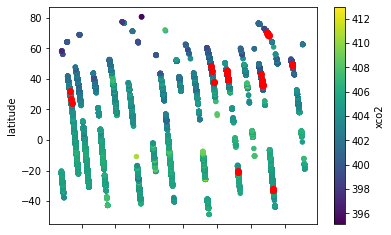

In [24]:
df_full.plot.scatter(x='longitude', y='latitude', c='xco2', colormap='viridis') # c='xco2'
lats = [ p['latitude'] for p in peak_founds]
longs = [ p['longitude'] for p in peak_founds]
deltas = [ p['delta']**2 for p in peak_founds]
print(deltas)
plt.scatter(longs, lats, c='r')

In [25]:
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

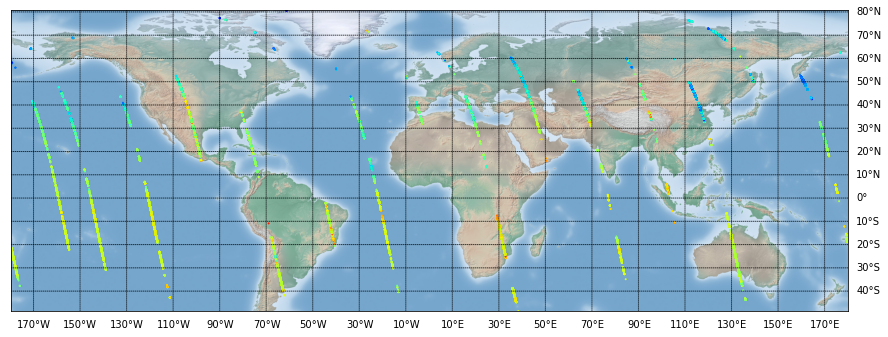

In [29]:
draw_map_df(df_full, lon_min=min(df_full['longitude']), lon_max=max(df_full['longitude']), lat_min=min(df_full['latitude']), lat_max=max(df_full['latitude']))

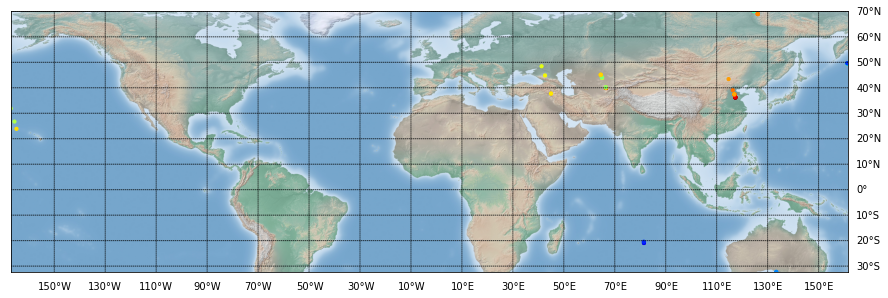

In [30]:
draw_map(lats,longs,deltas, lon_min=min(longs), lon_max=max(longs), lat_min=min(lats), lat_max=max(lats), size_point=10)

In [ ]:
# from mpl_toolkits.basemap import Basemap
# plt.figure(figsize=(15, 10), edgecolor='w')
# #m = Basemap(llcrnrlat=min(lats)-10, urcrnrlat=max(lats)+10, llcrnrlon=min(longs)-10, urcrnrlon=max(longs)+10)
# m = Basemap(llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# m.shadedrelief()

# parallels = np.arange(-80.,81,10.)
# m.drawparallels(parallels,labels=[False,True,True,False])

# meridians = np.arange(10.,351.,20.)
# m.drawmeridians(meridians,labels=[True,False,False,True])

# normal = matplotlib.colors.LogNorm(vmin=min(deltas), vmax=max(deltas))

# m.scatter(lats, longs, c='r', cmap=plt.cm.jet, s=1, norm=normal)

# #m.drawcountries(linewidth=0.5)
# #m.drawcoastlines(linewidth=0.7)

# plt.show()

# Switch to Cartopy

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature


# def sample_data(shape=(20, 30)):
#     """
#     Return ``(x, y, u, v, crs)`` of some vector data
#     computed mathematically. The returned crs will be a rotated
#     pole CRS, meaning that the vectors will be unevenly spaced in
#     regular PlateCarree space.

#     """
#     crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

#     x = np.linspace(311.9, 391.1, shape[1])
#     y = np.linspace(-23.6, 24.8, shape[0])

#     x2d, y2d = np.meshgrid(x, y)
#     u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
#     v = 20 * np.cos(6 * np.deg2rad(x2d))

#     return x, y, u, v, crs


# def main():
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

#     ax.add_feature(cfeature.OCEAN, zorder=0)
#     ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

#     ax.set_global()
#     ax.gridlines()

#     x, y, u, v, vector_crs = sample_data()
#     ax.quiver(x, y, u, v, transform=vector_crs)

#     plt.show()


# if __name__ == '__main__':
#     main()

---